In [21]:
import sys
sys.path.insert(0, '../../python_dms/lib/')

# from dms import *
from tools_dms import *
# from tools_trof import *
from PIL import Image
import scipy as scp
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
import matplotlib.pyplot as plt
import scipy.io

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
namefile = 'dots_52_v3_noise_0.05_blur_1_1_3'

degraded_data=  scipy.io.loadmat('../../degraded_images/'+namefile+'.mat')
f = degraded_data['f']
fNoisy = degraded_data['fNoisy']
e_exacte = degraded_data['e_exacte']
A = degraded_data['A_python']
eps_min=0
eps_min = 0.02

method='PALM'
normtype='AT-fourier'

eps=0.2
mit=300
print('Noisy PSNR:',PSNR(fNoisy,f))

Noisy PSNR: 26.078416417503373


Objective: Jaccard
Round:  0   0.8602941176470589 beta:   0.1 , lam:   0.001
Round:  1   0.8602941176470589 beta:   0.1 , lam:   0.001
Round:  2   0.8602941176470589 beta:   0.1 , lam:   0.001
Round:  3   0.8602941176470589 beta:   0.1 , lam:   0.001
Round:  4   0.8602941176470589 beta:   0.1 , lam:   0.001




Meaningful r (optimum is in the middle) 5
Total Computation time: 37.651970624923706
Noisy PSNR: 26.078416417503373
DMS PSNR:  27.092999923885557
Jaccard: 0.8602941176470589


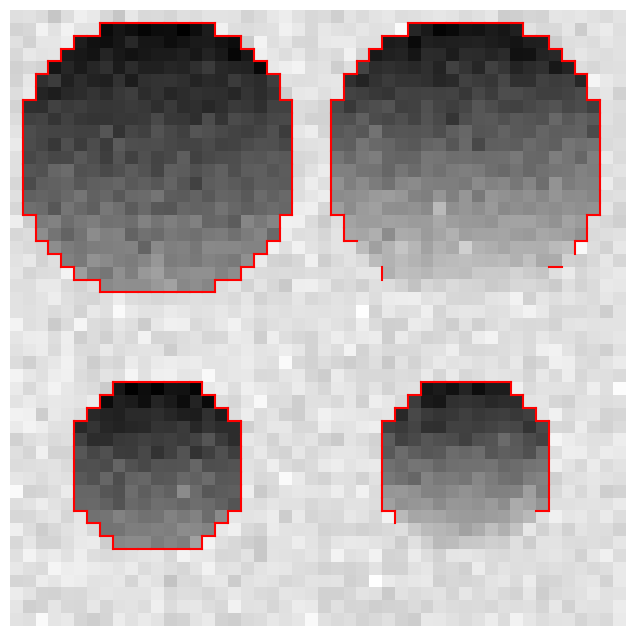

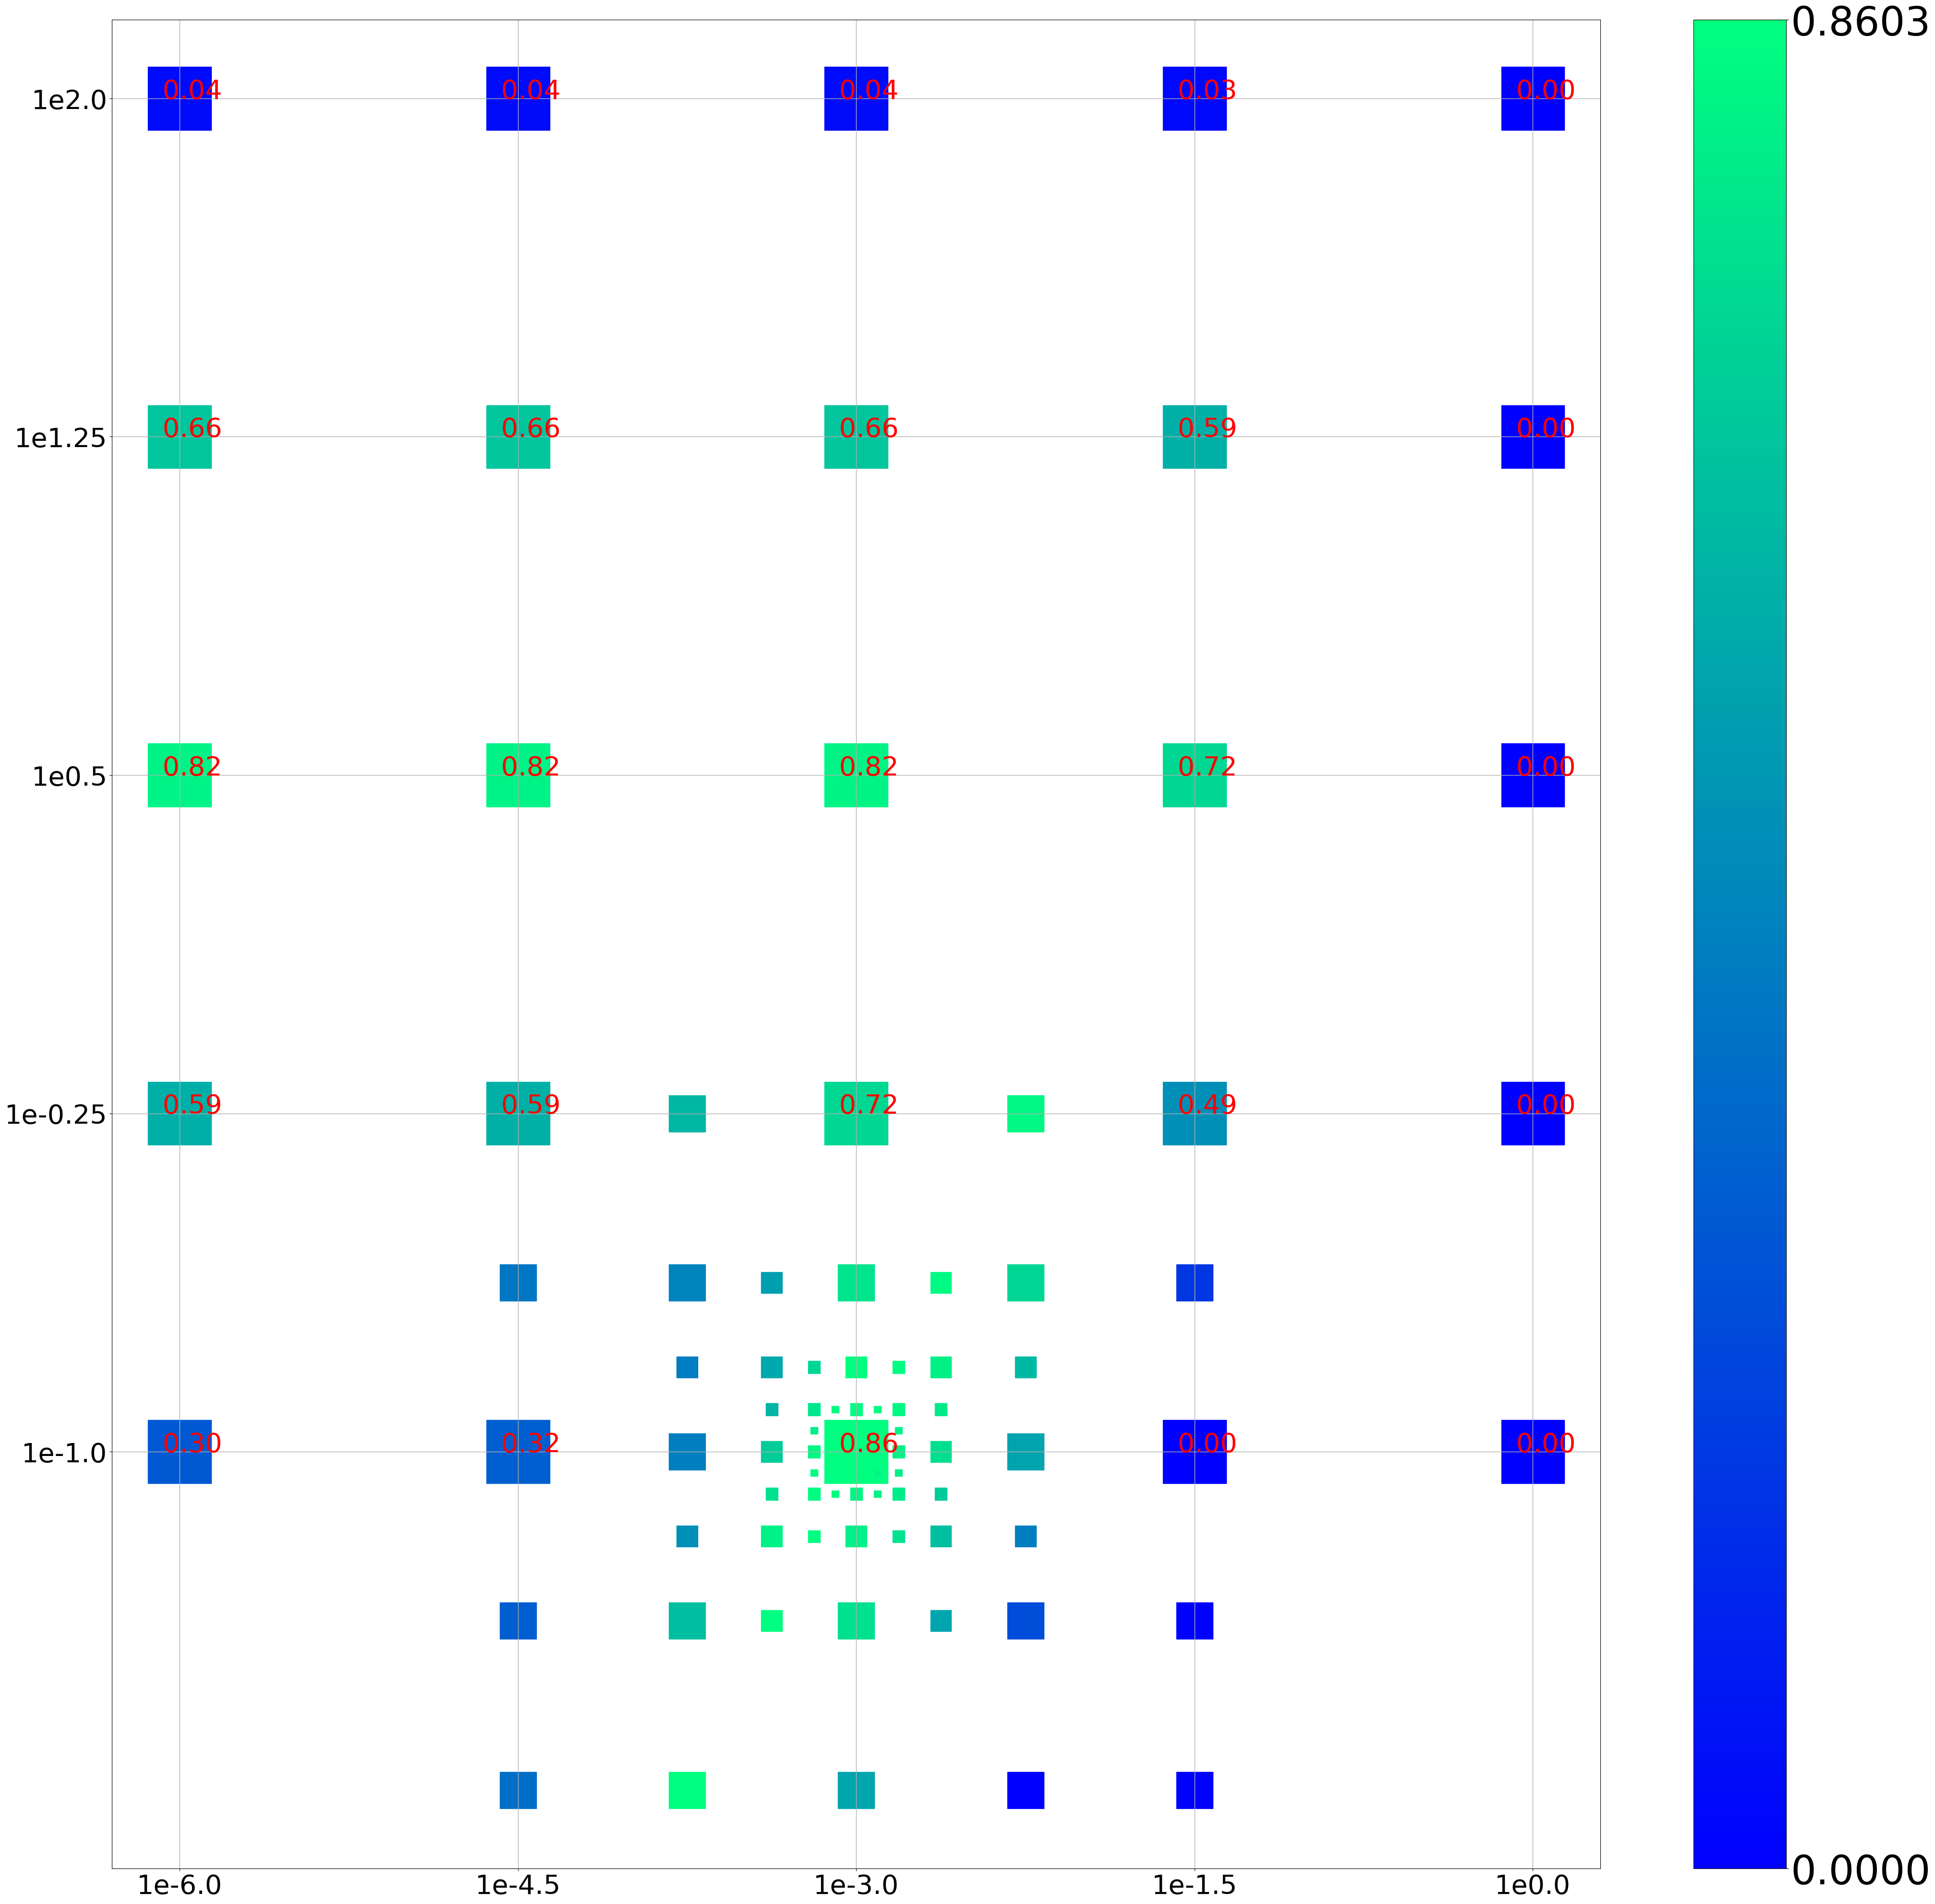

In [23]:
a2,b2,c2,im_rec,cont_rec=golden_section_map(lmin=-6,lmax=0,bmin=-1,bmax=2,
                                            noised_im1=fNoisy,im1=f,
                                            contours_im1=e_exacte,scale_type='10',
                                            stop_crit=1e-4,grid_size=5,max_round=5,
                                            objective='Jaccard',method=method,norm_type=normtype,
                                            maxiter=mit,eps=eps,
                                            A=A,eps_AT_min=eps_min)
cont_rec = np.ones_like(cont_rec)*(cont_rec>0.5)
print('Noisy PSNR:',PSNR(fNoisy,f))
print('DMS PSNR: ', PSNR(im_rec,f))
print('Jaccard:',jaccard(cont_rec,e_exacte))

ac=plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(im_rec,'gray')
draw_contour(cont_rec,'',fig=ac)
# plt.savefig('../SPL-fig3/'+namefile+'_Jaccard_ggs.png', bbox_inches='tight', pad_inches=0)


draw_dots_multiresolution(b2,a2,beta_axis=np.linspace(-1,2,5),lambda_axis=np.linspace(-6,0,5),name='PSNR')


Objective: PSNR
Round:  0   33.34704452302947
Round:  1   34.45710513822175
Round:  2   34.54875057261053
Round:  3   34.659721719843056
Round:  4   34.659721719843056




Meaningful r (optimum is in the middle) 5
Total Computation time: 178.75297141075134
PSNR out
Noisy PSNR: 26.078416417503373
DMS PSNR:  34.659721719843056
Jaccard: 0.059027777777777776


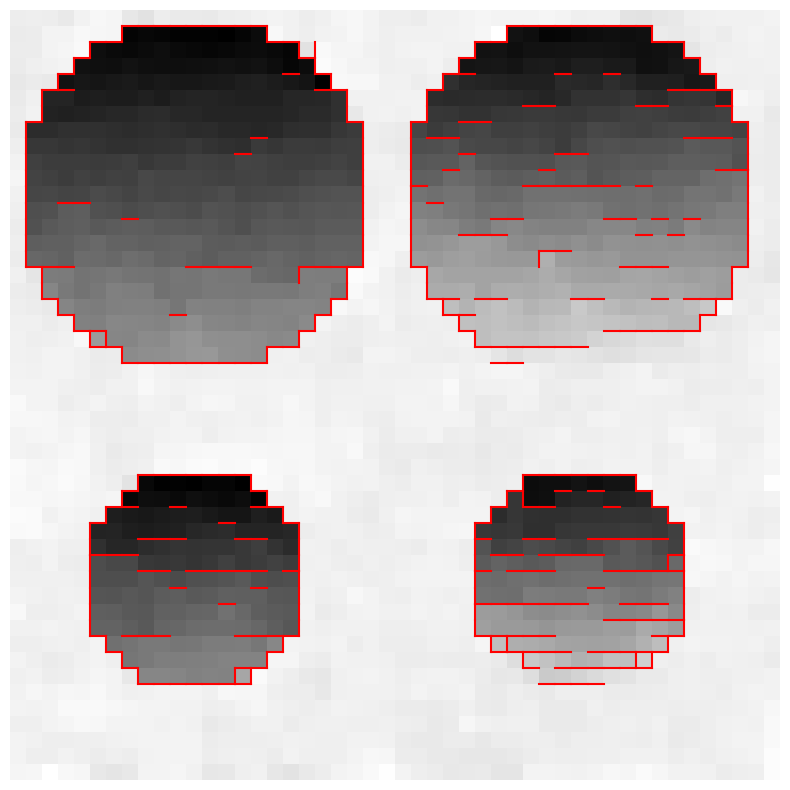

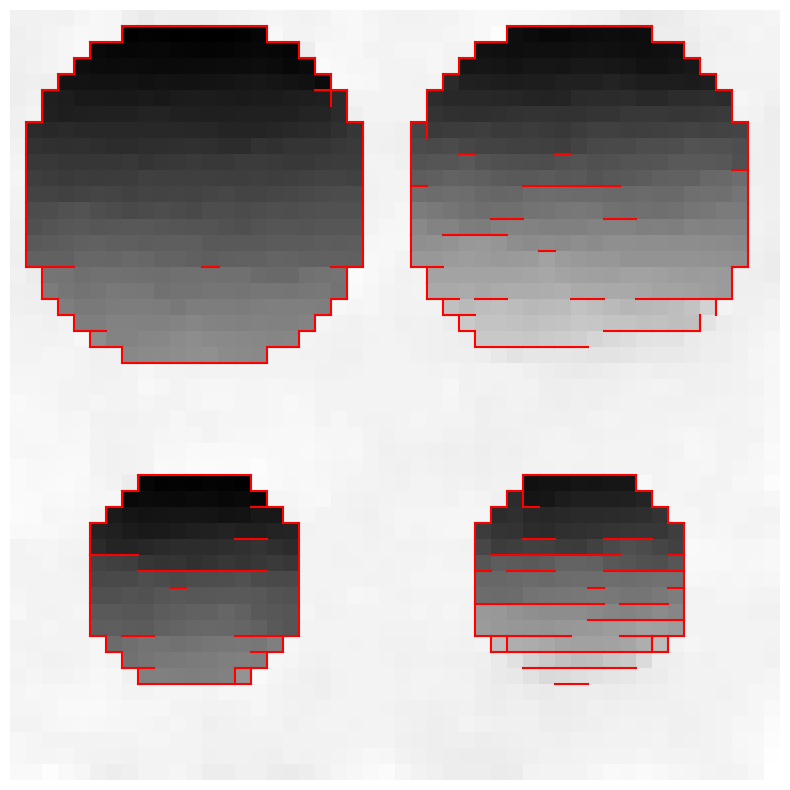

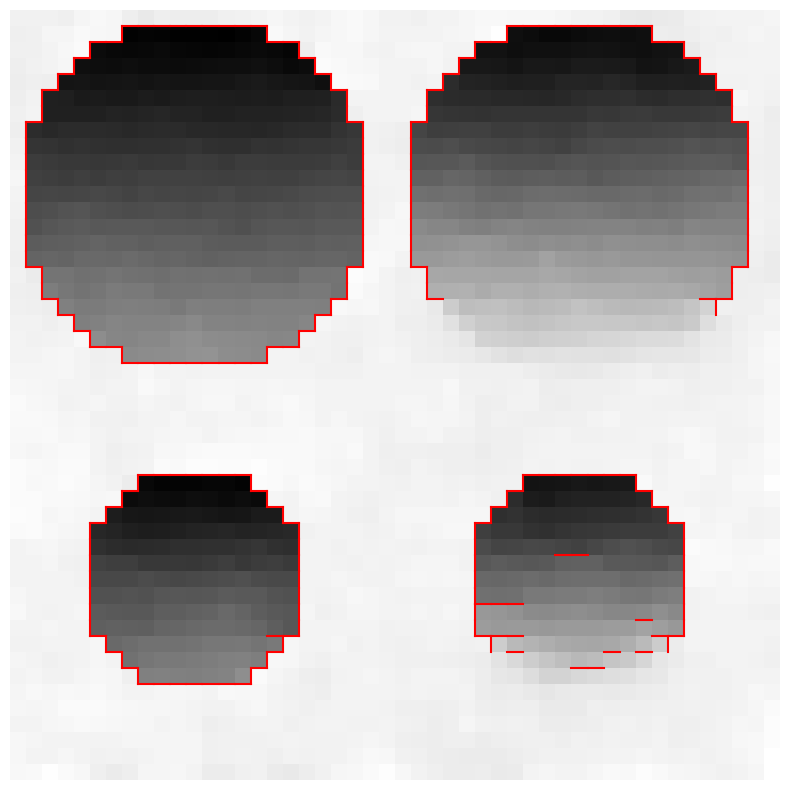

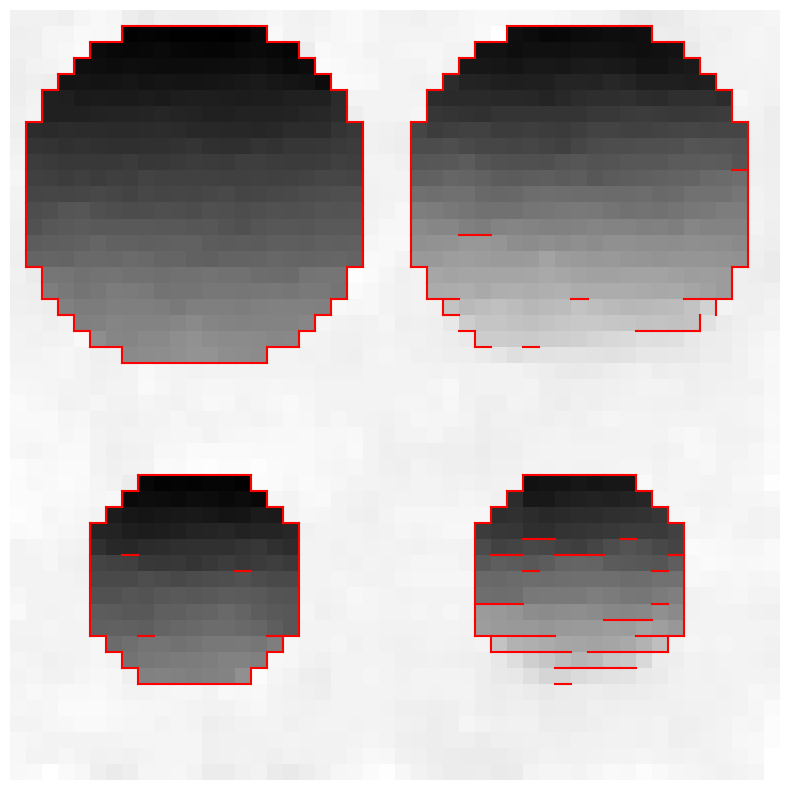

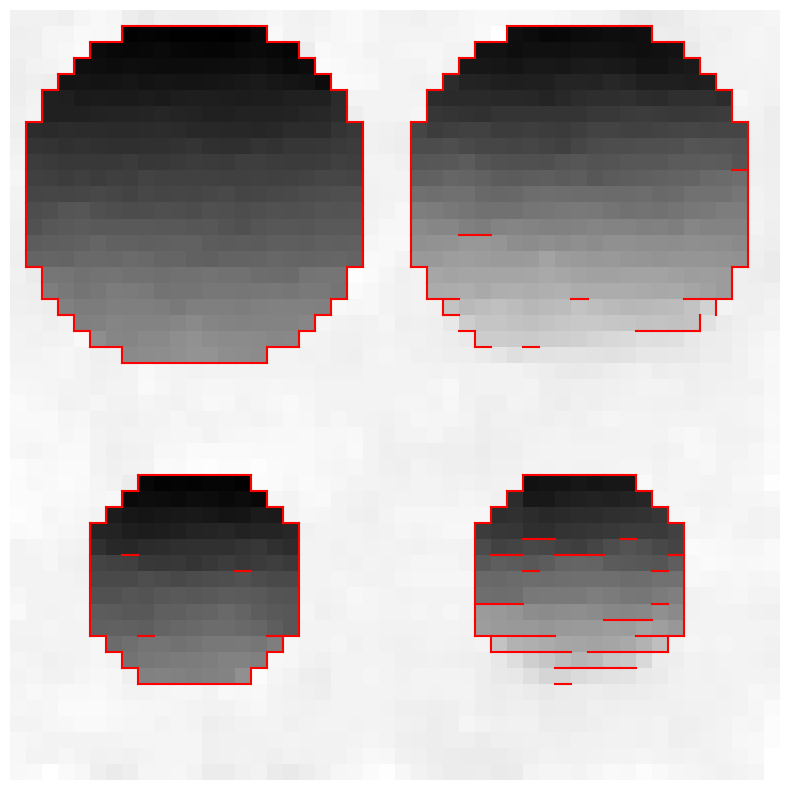

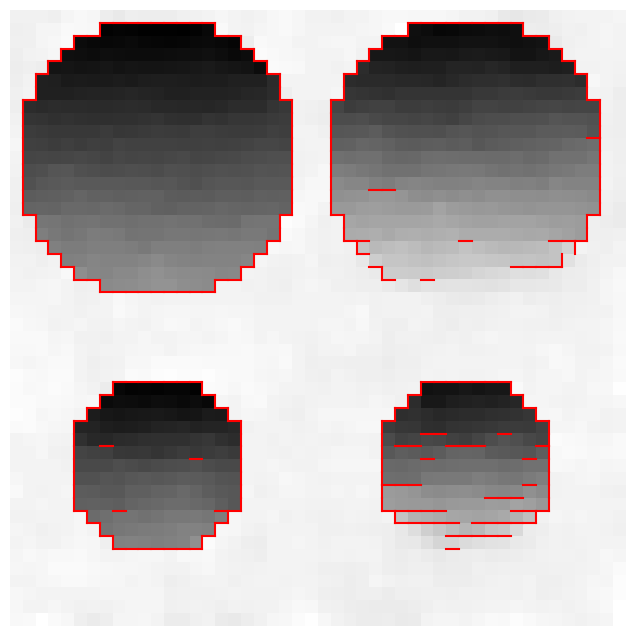

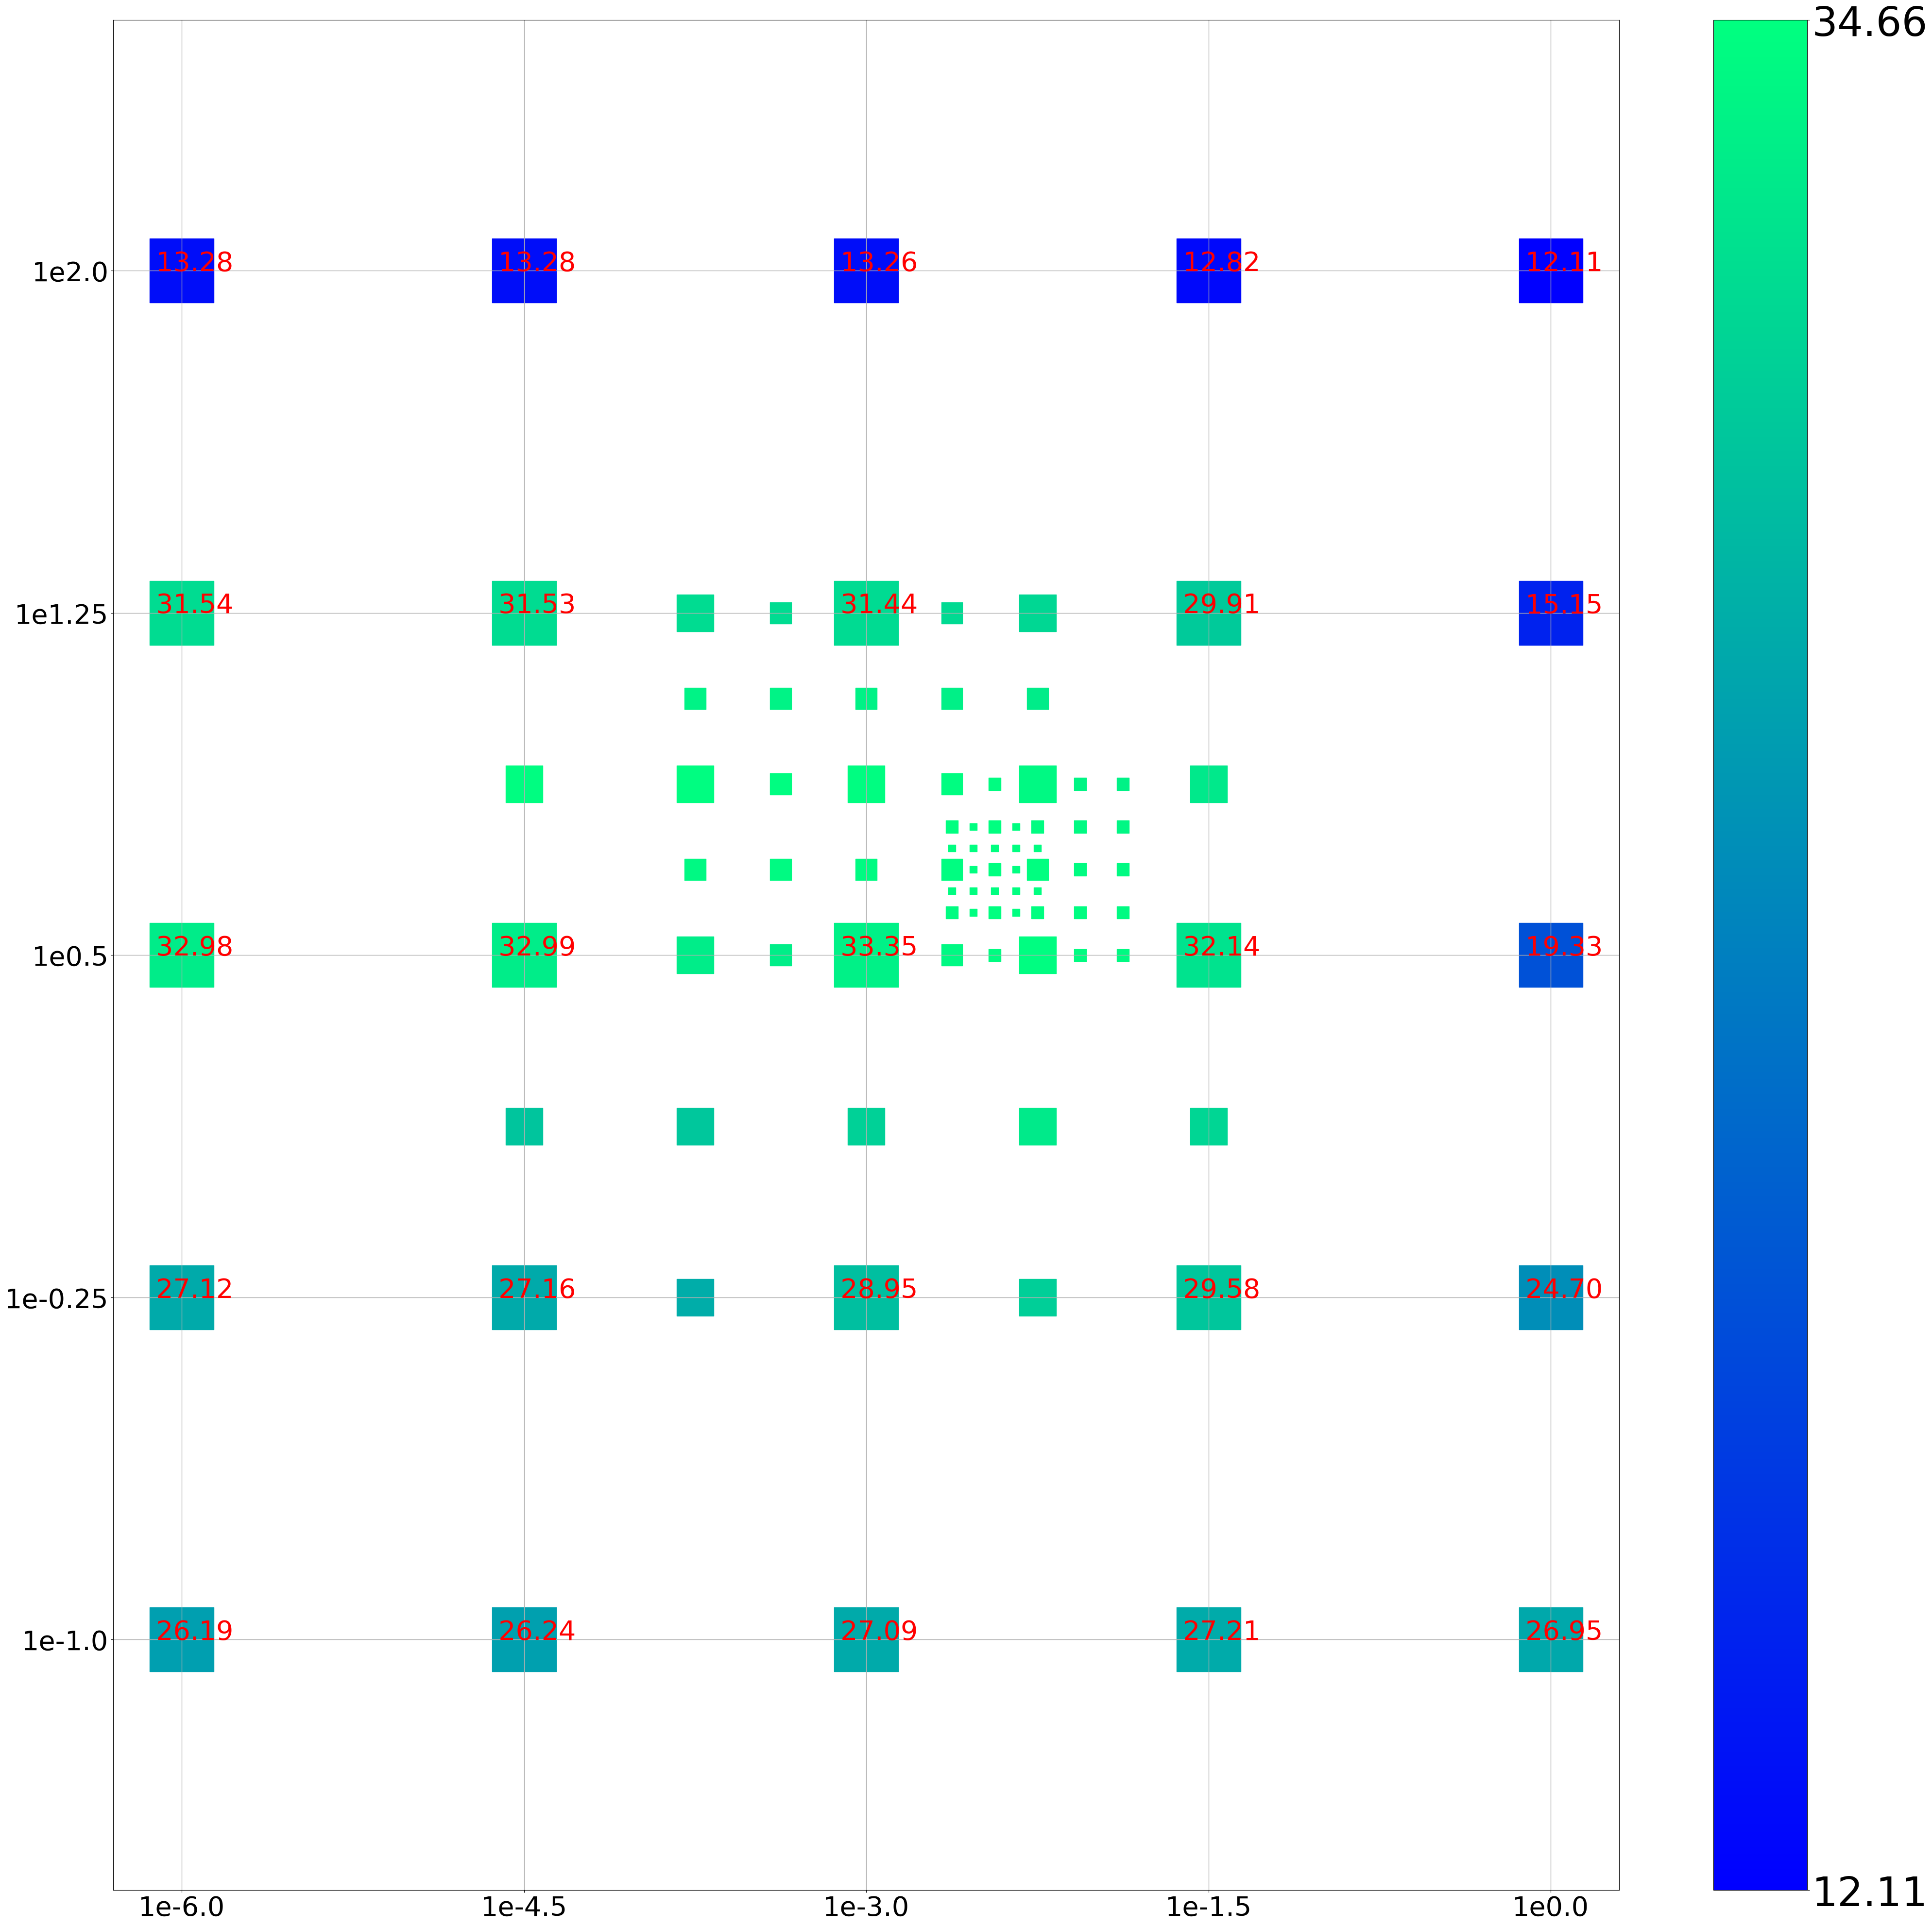

In [25]:


a2,b2,c2,im_rec,cont_rec=golden_section_map(lmin=-6,lmax=0,bmin=-1,bmax=2,
                                                            noised_im1=fNoisy,im1=f,
                                                            contours_im1=e_exacte,scale_type='10',
                                                            stop_crit=1e-4,grid_size=5,max_round=5,
                                                            objective='PSNR',method=method,norm_type=normtype,
                                                            maxiter=1000,eps=eps,
                                                            A=A,eps_AT_min=eps_min)
print('Noisy PSNR:',PSNR(fNoisy,f))
print('DMS PSNR: ', PSNR(im_rec,f))
print('Jaccard:',jaccard(cont_rec,e_exacte))

ac=plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(im_rec,'gray')
draw_contour(cont_rec,'',fig=ac)
# plt.savefig('../SPL-tab1/'+namefile+'_PSNR_ggs.png', bbox_inches='tight', pad_inches=0)
draw_dots_multiresolution(b2,a2,beta_axis=np.linspace(-1,2,5),lambda_axis=np.linspace(-6,0,5),name='PSNR')
# plt.savefig('fig2.png')


Objective: Jaccard


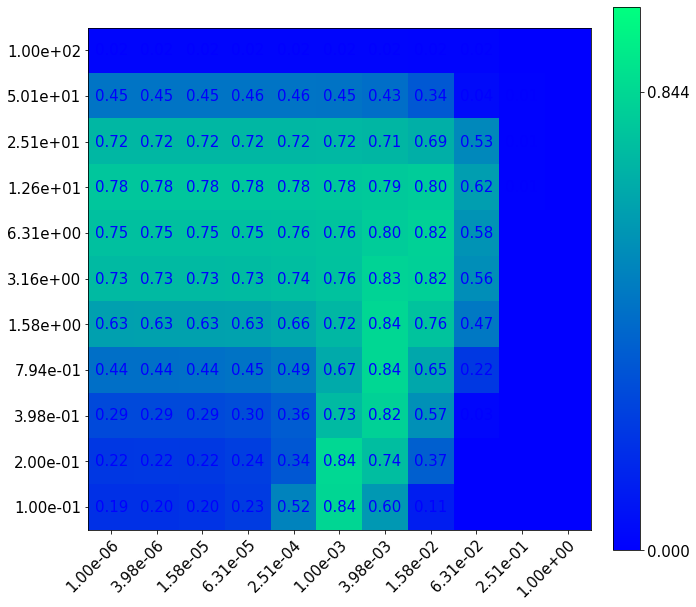

Round:  0
coord_max_Jaccard_curr:  (9, 5) $\beta$:  0.19952623149688808 $\lambda$:  0.001
Jaccard:  0.8439716312056738 CT:  0.42150020599365234 seconds    Iter: 332


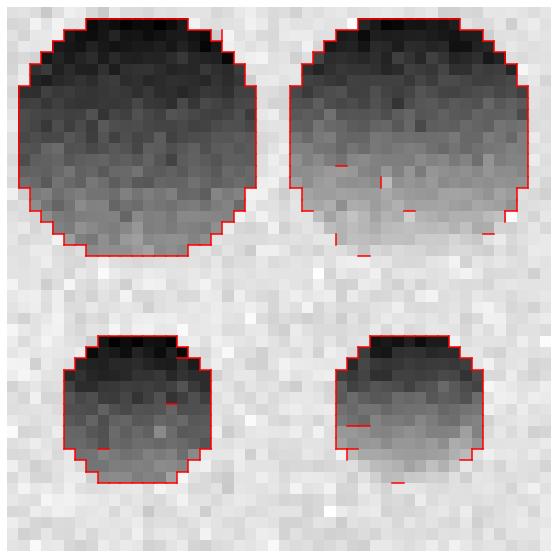

In [9]:
a3,b3,c3,im_rec,cont_rec= grid_search(noised_im1=fNoisy,im1=f,contours_im1=e_exacte,lmin=-6,lmax=0,bmin=-1,bmax=2,
                                      scale_type='10',grid_size=11,max_round=1,objective='Jaccard',
                                      maxiter=1000,stop_crit=1e-4,method='PALM',norm_type='AT-fourier',
                                      A=A,eps=eps)